In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("E:\DataScience-data\insurance.csv")

In [3]:
df.shape

(1338, 7)

In [4]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
a=["sex","smoker","region"]
b=['age','bmi','children','charges']

male      676
female    662
Name: sex, dtype: int64


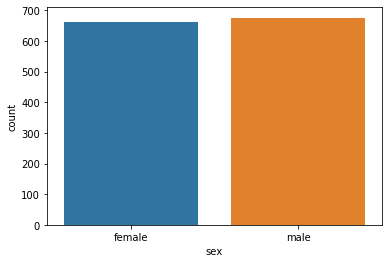

no     1064
yes     274
Name: smoker, dtype: int64


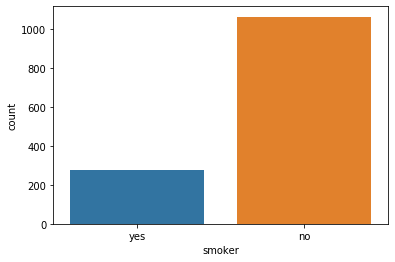

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


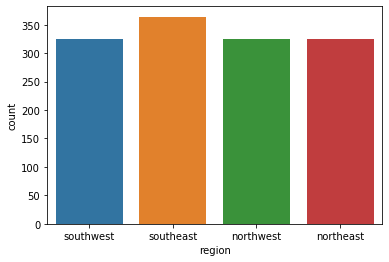

In [12]:
for i in a:
    print(df[i].value_counts())
    sns.countplot(x=i,data=df)
    plt.show()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
0.05567251565299186


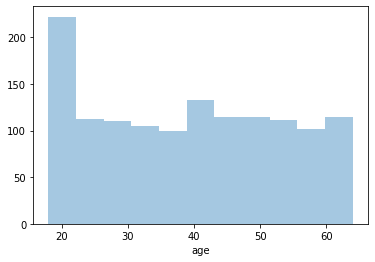

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
0.2840471105987448


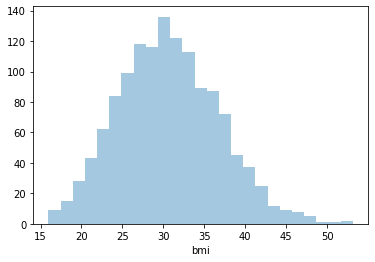

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
0.9383804401702414


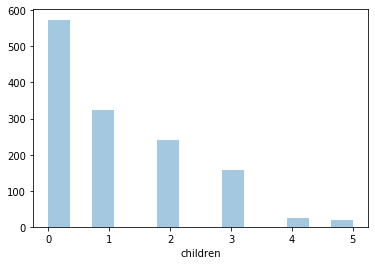

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
1.5158796580240388


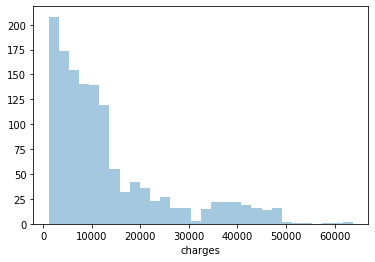

In [13]:
for i in b:
    sns.distplot(df[i],kde=False)
    print(df[i].describe())
    print(df[i].skew())
    plt.show()

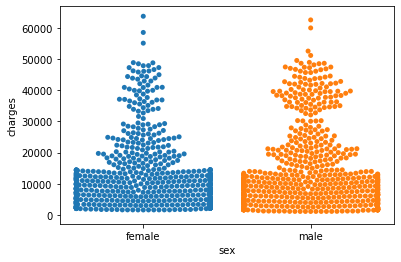

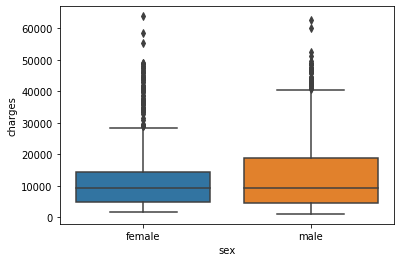

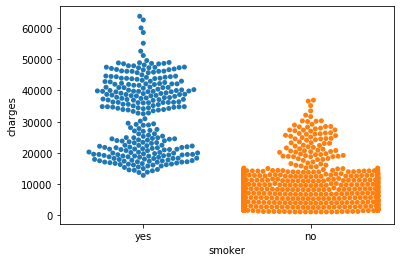

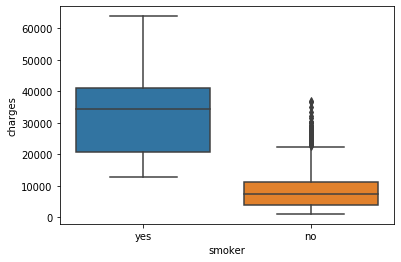

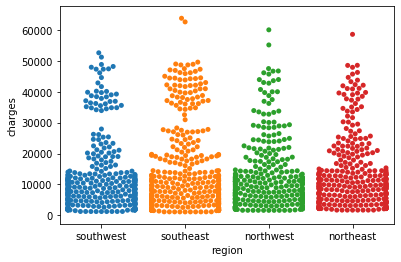

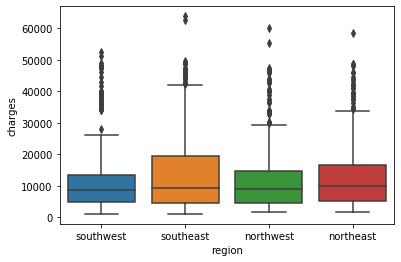

In [14]:
#bivariate Analysis
for i in a:
    sns.swarmplot(x=i,y="charges",data=df)
    plt.show()
    sns.boxplot(x=i,y="charges",data=df)
    plt.show()

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


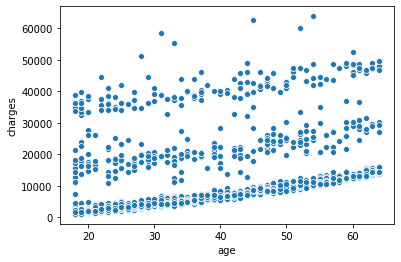

              bmi   charges
bmi      1.000000  0.198341
charges  0.198341  1.000000


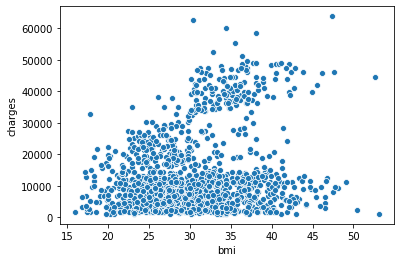

          children   charges
children  1.000000  0.067998
charges   0.067998  1.000000


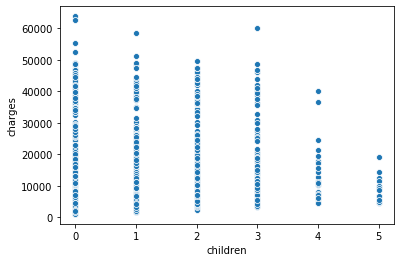

         charges  charges
charges      1.0      1.0
charges      1.0      1.0


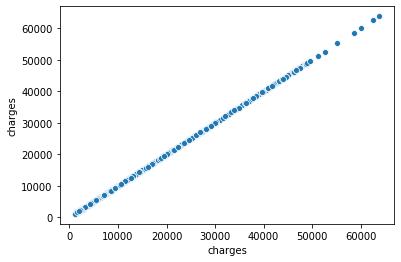

In [16]:
for i in b:
    sns.scatterplot(x=i,y="charges",data=df)
    print(df[[i,"charges"]].corr())
    plt.show()

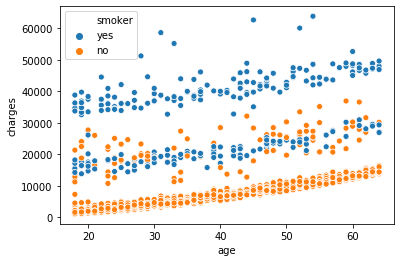

In [17]:
sns.scatterplot(x="age",y="charges",hue="smoker",data=df)
plt.show()

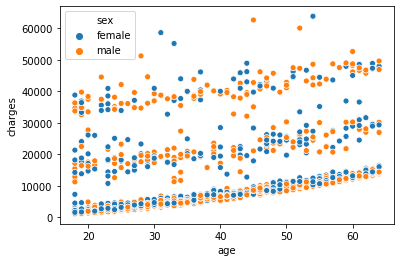

In [18]:
sns.scatterplot(x="age",y="charges",hue="sex",data=df)
plt.show()

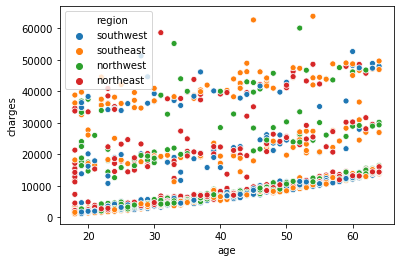

In [19]:
sns.scatterplot(x="age",y="charges",hue="region",data=df)
plt.show()

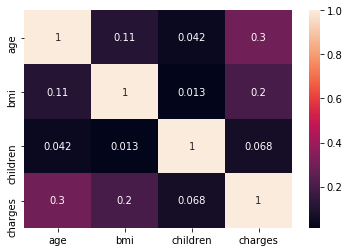

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.show()

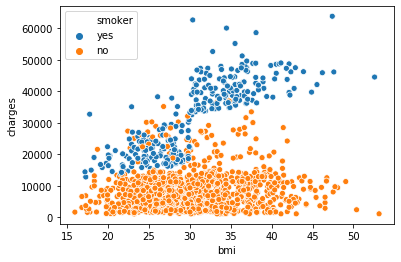

In [27]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)
plt.show()

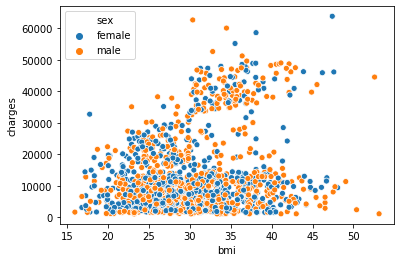

In [29]:
sns.scatterplot(x="bmi",y="charges",hue="sex",data=df)
plt.show()

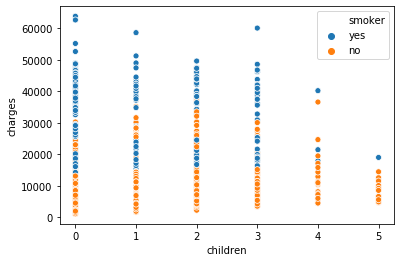

In [31]:
sns.scatterplot(x="children",y="charges",hue="smoker",data=df)
plt.show()

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
from sklearn.preprocessing import LabelEncoder
L1=LabelEncoder()
L2=LabelEncoder()
L3=LabelEncoder()
df["sex"]=L1.fit_transform(df['sex'])
df["smoker"]=L2.fit_transform(df['smoker'])
df["region"]=L3.fit_transform(df['region'])

In [39]:
print(L1.classes_)
print(L2.classes_)
print(L3.classes_)

[0 1]
[0 1]
[0 1 2 3]


In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [42]:
x=df.drop('charges',axis=1)
y=df['charges']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [43]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [49]:
algo=MLPRegressor(hidden_layer_sizes=(50,50),max_iter=2000,verbose=True)
algo.fit(xtrain,ytrain)

Iteration 1, loss = 159188322.87247249
Iteration 2, loss = 159104138.04441807
Iteration 3, loss = 159027099.81034619
Iteration 4, loss = 158949880.38320535
Iteration 5, loss = 158870159.29731640
Iteration 6, loss = 158785753.27901024
Iteration 7, loss = 158690698.12070930
Iteration 8, loss = 158582355.49286771
Iteration 9, loss = 158455054.48185658
Iteration 10, loss = 158302972.64499572
Iteration 11, loss = 158120376.54704091
Iteration 12, loss = 157904261.10508826
Iteration 13, loss = 157646092.13137299
Iteration 14, loss = 157341122.02051643
Iteration 15, loss = 156979925.82308650
Iteration 16, loss = 156570872.53630060
Iteration 17, loss = 156087648.01526555
Iteration 18, loss = 155524734.48646936
Iteration 19, loss = 154908919.47391412
Iteration 20, loss = 154176672.04119524
Iteration 21, loss = 153367741.03664440
Iteration 22, loss = 152460430.05546284
Iteration 23, loss = 151457915.34022352
Iteration 24, loss = 150319645.48516667
Iteration 25, loss = 149085783.18068811
Iteration

C:\Users\aspdiscovery\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [50]:
ypred=algo.predict(xtest)

In [51]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))

3518.475213743095
0.7916542405325353


In [52]:
algo2=LinearRegression()
algo2.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
ypred=algo2.predict(xtest)

In [54]:
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))

4398.428215481645
0.7376479835099085


In [56]:
algo3=DecisionTreeRegressor()
algo3.fit(xtrain,ytrain)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [57]:
ypred=algo3.predict(xtest)
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))



3580.5015975000006
0.6699490547911213


In [60]:
import joblib
joblib.dump(algo,r"E:\DataScience-data\ann-model.pkl")


['E:\\DataScience-data\\ann-model.pkl']

In [62]:
new=np.array([[25,0,38.23,3,1,1]])
algo.predict(new)

array([36374.46877955])

In [63]:
joblib.dump(L1,r"E:\DataScience-data\ann-model-l1.pkl")
joblib.dump(L2,r"E:\DataScience-data\ann-model-l2.pkl")
joblib.dump(L3,r"E:\DataScience-data\ann-model-l3.pkl")

['E:\\DataScience-data\\ann-model-l3.pkl']